In [1]:
from google.colab import drive
# Mount GDrive to connect Google Drive and Google Colab for reading/writing data.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
modeRun = 'colab'
#modeRun = 'local'
if modeRun == 'colab':
    from google.colab import drive
    drive.mount('/content/gdrive')
    train_dir = '/content/gdrive/MyDrive/Colab Notebooks/INTAR/project/chest_xray/train'
    val_dir = '/content/gdrive/MyDrive/Colab Notebooks/INTAR/project/chest_xray/val'
    test_dir = '/content/gdrive/MyDrive/Colab Notebooks/INTAR/project/chest_xray/test'

else:
    dataPath = "./chest_xray/"

Mounted at /content/gdrive


In [3]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer
from sklearn.preprocessing import LabelEncoder
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
#PreTrained Model
from tensorflow.keras.applications import *
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Warnings Remove
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix

In [7]:
# Initialize lists to store file paths and corresponding labels
filepaths = []
labels = []

# Loop through each folder (label) in the train directory
for label_name in os.listdir(train_dir):
    label_path = os.path.join(train_dir, label_name)

    # Loop through each image in the label folder
    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        filepaths.append(img_path)
        labels.append(label_name)

# Create a DataFrame by combining the file paths and labels
df_train = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})



In [8]:
df_train


,filepath,label
0,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,NORMAL
1,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,NORMAL
2,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,NORMAL
3,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,NORMAL
4,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,NORMAL
...,...,...
5212,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
5213,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
5214,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
5215,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA


In [10]:
# Initialize lists to store file paths and corresponding labels
filepaths = []
labels = []

# Loop through each folder (label) in the test directory
for label_name in os.listdir(test_dir):
    label_path = os.path.join(test_dir, label_name)

    # Loop through each image in the label folder
    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        filepaths.append(img_path)
        labels.append(label_name)

# Create a DataFrame by combining the file paths and labels
df_test = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

In [11]:
df_test


,filepath,label
0,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
1,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
2,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
3,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
4,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
...,...,...
619,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,NORMAL
620,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,NORMAL
621,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,NORMAL
622,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,NORMAL


In [13]:
# Initialize lists to store file paths and corresponding labels
filepaths = []
labels = []

# Loop through each folder (label) in the val directory
for label_name in os.listdir(val_dir):
    label_path = os.path.join(val_dir, label_name)

    # Loop through each image in the label folder
    for img_name in os.listdir(label_path):
        img_path = os.path.join(label_path, img_name)
        filepaths.append(img_path)
        labels.append(label_name)

# Create a DataFrame by combining the file paths and labels
df_val = pd.DataFrame({
    'filepath': filepaths,
    'label': labels
})

In [14]:
df_val


,filepath,label
0,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
1,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
2,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
3,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
4,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
5,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
6,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
7,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,PNEUMONIA
8,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,NORMAL
9,/content/gdrive/MyDrive/Colab Notebooks/INTAR/...,NORMAL


In [15]:
# Shape
print(f"The shape of The Train data is: {df_train.shape}")
print(f"The shape of The Test data is: {df_test.shape}")
print(f"The shape of The Validation data is: {df_val.shape}")

The shape of The Train data is: (5217, 2)
The shape of The Test data is: (624, 2)
The shape of The Validation data is: (16, 2)


In [16]:
# Set image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 123


In [17]:
# Create the training dataset
print('Training Images:')
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    validation_split=0.1,
    subset='training',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Training Images:
Found 5217 files belonging to 2 classes.
Using 4696 files for training.


In [18]:
# Create the validation dataset
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    validation_split=0.1,
    subset='validation',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Validation Images:
Found 5217 files belonging to 2 classes.
Using 521 files for validation.


In [19]:
# Create the testing dataset
print('Testing Images:')
test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=test_dir,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

Testing Images:
Found 624 files belonging to 2 classes.


In [20]:
# Extract labels
train_labels = train_ds.class_names
test_labels = test_ds.class_names
validation_labels = validation_ds.class_names


In [21]:
# Encode Labels

# Define your class labels
class_labels = ['NORMAL', 'PNEUMONIA']

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder on the class labels
label_encoder.fit(class_labels)

# Transform the labels for training dataset
train_labels_encoded = label_encoder.transform(train_labels)

# Transform the labels for validation dataset
validation_labels_encoded = label_encoder.transform(validation_labels)

# Transform the labels for test dataset
test_labels_encoded = label_encoder.transform(test_labels)

In [22]:
# Shape of the dataset
for image_batch, labels_batch in train_ds:
    print("Shape of X_train: ", image_batch.shape)
    print("Shape of y_train: ", labels_batch.shape)
    break

Shape of X_train:  (32, 224, 224, 3)
Shape of y_train:  (32,)


In [23]:
# Normalizing Pixel Values

# Train Data
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))
# Test Data
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

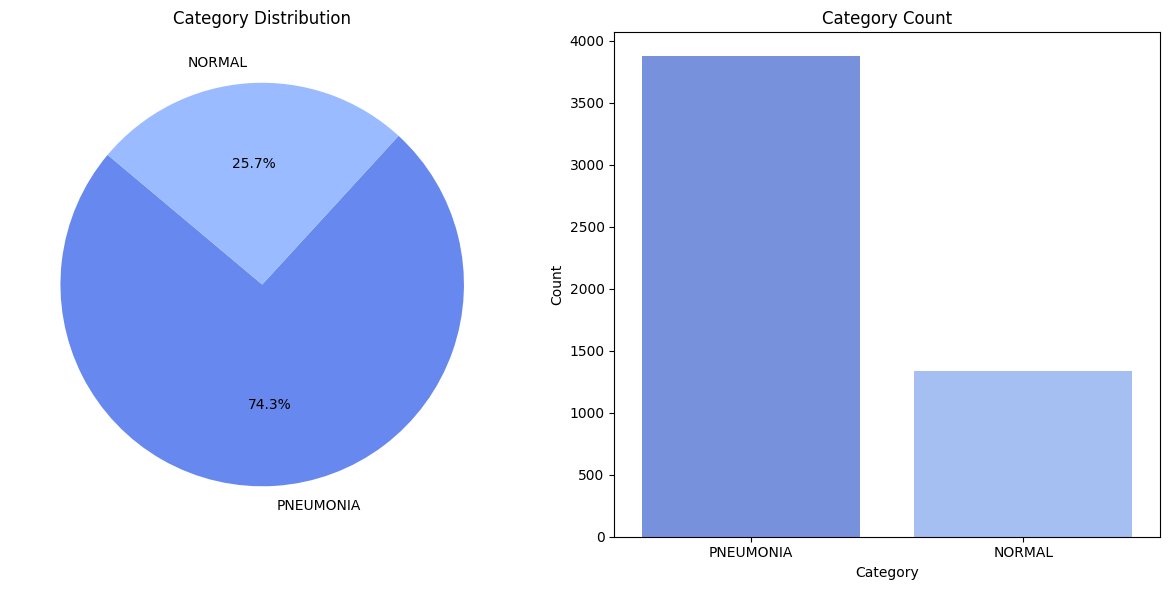

In [24]:
# Count the occurrences of each label
label_counts = df_train['label'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Set the new color palette
palette = sns.color_palette("coolwarm")
sns.set_palette(palette)

# Plot the pie chart
axes[0].pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[0].set_title('Category Distribution')

# Plot the bar chart
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    ax=axes[1],
    palette=palette
)

axes[1].set_title('Category Count')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Category')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

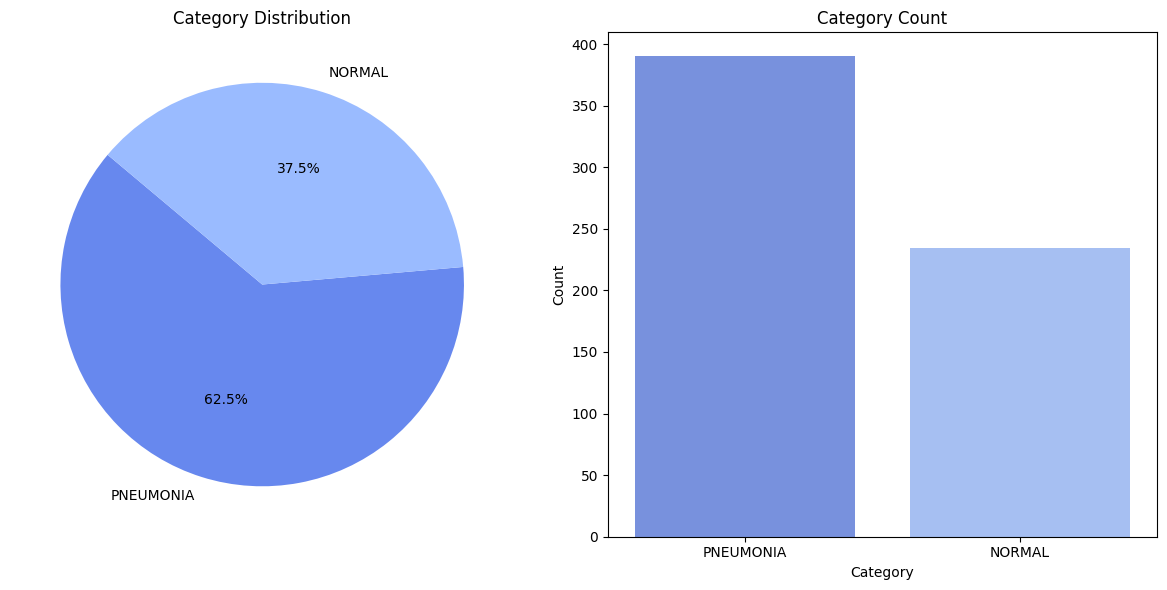

In [25]:
# Count the occurrences of each label
label_counts = df_test['label'].value_counts()

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Set the new color palette
palette = sns.color_palette("coolwarm")
sns.set_palette(palette)

# Plot the pie chart
axes[0].pie(
    label_counts,
    labels=label_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=palette
)
axes[0].set_title('Category Distribution')

# Plot the bar chart
sns.barplot(
    x=label_counts.index,
    y=label_counts.values,
    ax=axes[1],
    palette=palette
)
axes[1].set_title('Category Count')
axes[1].set_ylabel('Count')
axes[1].set_xlabel('Category')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

In [26]:
def visualize_images(path, num_images=5):
    """
    Visualizes a set number of images from the specified directory.

    Parameters:
    - path (str): Directory containing images.
    - num_images (int): Number of images to visualize (default is 5).
    """
    # Get all image filenames in the given path
    image_filenames = os.listdir(path)

    # Make sure we don't exceed the number of available images
    num_images = min(num_images, len(image_filenames))

    # Set up the figure
    fig, axes = plt.subplots(1, num_images, figsize=(15, 4), facecolor='white')

    # If only one image, make axes iterable
    if num_images == 1:
        axes = [axes]
    # Loop through and display each image
    for idx, filename in enumerate(image_filenames[:num_images]):
        img_path = os.path.join(path, filename)
        image = mpimg.imread(img_path)

        axes[idx].imshow(image)
        axes[idx].axis('off')
        axes[idx].set_title(filename, fontsize=10)

    plt.tight_layout()
    plt.show()

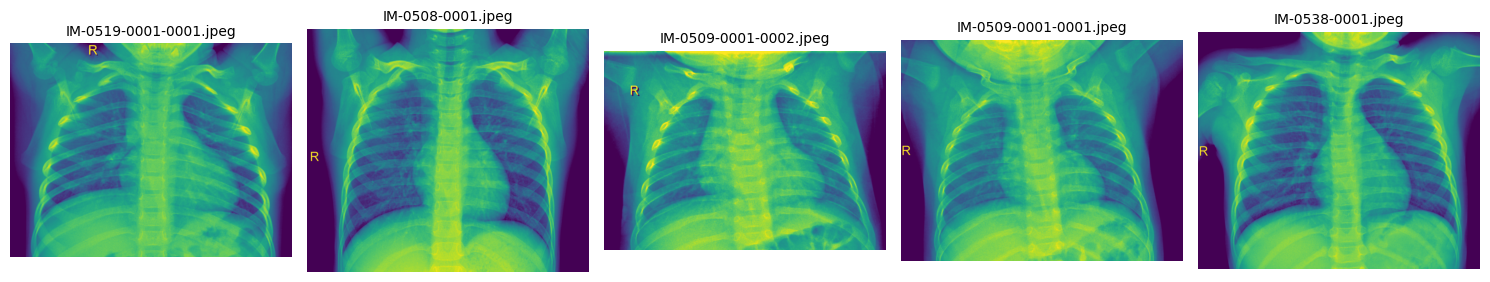

In [27]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/gdrive/MyDrive/Colab Notebooks/INTAR/project/chest_xray/train/NORMAL"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

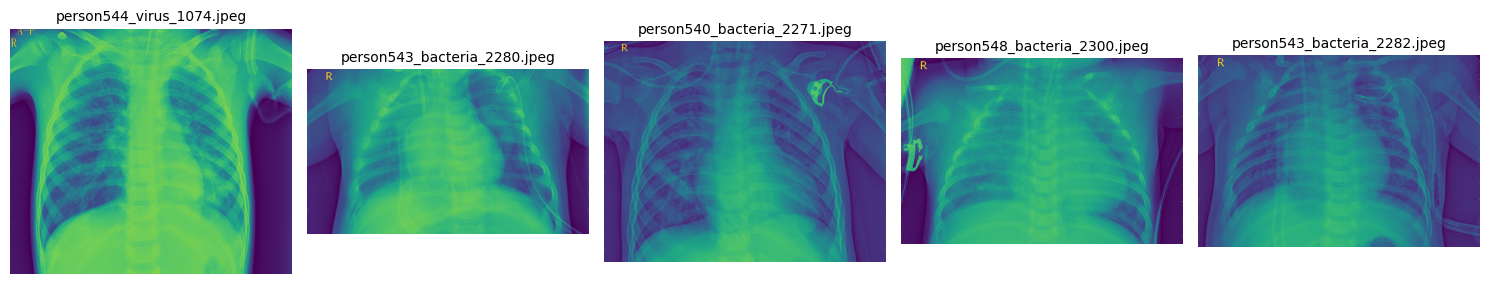

In [28]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/gdrive/MyDrive/Colab Notebooks/INTAR/project/chest_xray/train/PNEUMONIA"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

In [29]:
import tensorflow as tf
from tensorflow import keras
from transformers import TFViTModel
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense

# 1. Define the ViT wrapper
class ViTWrapper(keras.layers.Layer):
    def __init__(self, vit_model, **kwargs):
        super().__init__(**kwargs)
        self.vit_model = vit_model

    def call(self, inputs):
        # Convert from (batch, height, width, channels) ➔ (batch, channels, height, width)
        inputs = tf.transpose(inputs, perm=[0, 3, 1, 2])
        outputs = self.vit_model(pixel_values=inputs)
        return outputs.last_hidden_state

    def get_config(self):
        # Add vit_model to config dictionary
        config = super().get_config()
        config.update({
            "vit_model": self.vit_model.config.to_dict(),  # Save the configuration of the ViT model
        })
        return config

# 2. Load the Huggingface TFViTModel
base_model = TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')  # or any checkpoint you want

# Freeze the model weights
for layer in base_model.layers:
    layer.trainable = False

# 3. Define the Keras input
input_layer = keras.Input(shape=(224, 224, 3), dtype=tf.float32)
# 4. Apply ViT model using the wrapper
vit_outputs = ViTWrapper(base_model)(input_layer)

# 5. Global Average Pooling Layer
pooled_output = keras.layers.GlobalAveragePooling1D()(vit_outputs)

# 6. Create the model using the functional API
x = pooled_output

# Add Batch Normalization Layer
x = BatchNormalization()(x)

# 7. Add Dropout Layer 1
x = Dropout(0.45)(x)

# 8. Add Dense Layer 1
x = Dense(220, activation='relu')(x)

# 9. Add Dropout Layer 2
x = Dropout(0.25)(x)

# 10. Add Dense Layer 2
x = Dense(60, activation='relu')(x)

# 11. Add the Output Layer (Sigmoid for binary classification)
output_layer = Dense(1, activation='sigmoid')(x)

# 12. Define the full Keras Model using the functional API
model = keras.Model(inputs=input_layer, outputs=output_layer)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFViTModel.

All the weights of TFViTModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.


In [30]:
# Compile
model.compile(optimizer=Adamax(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
# Print the model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ vi_t_wrapper (ViTWrapper)       │ (None, 197, 768)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 768)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 768)            │         3,072 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 768)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 220)            │       169,180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 220)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 60)             │        13,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 185,573 (724.89 KB)

 Trainable params: 184,037 (718.89 KB)

 Non-trainable params: 1,536 (6.00 KB)

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

#Early_Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

#Fitting Model
history = model.fit(train_ds,
                    epochs= 50,
                    validation_data = validation_ds,
                    callbacks = early_stopping)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 615s 4s/step - accuracy: 0.8894 - loss: 0.2709 - val_accuracy: 0.9155 - val_loss: 0.4440
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 65s 437ms/step - accuracy: 0.9439 - loss: 0.1375 - val_accuracy: 0.9597 - val_loss: 0.2741
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 77s 404ms/step - accuracy: 0.9615 - loss: 0.1039 - val_accuracy: 0.9693 - val_loss: 0.1466
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 84s 415ms/step - accuracy: 0.9586 - loss: 0.1044 - val_accuracy: 0.9712 - val_loss: 0.0934
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 58s 395ms/step - accuracy: 0.9555 - loss: 0.1065 - val_accuracy: 0.9731 - val_loss: 0.0855
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 84s 406ms/step - accuracy: 0.9638 - loss: 0.0842 - val_accuracy: 0.9731 - val_loss: 0.0863
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 59s 397ms/step - accuracy: 0.9681 - loss: 0.0905 - val_accuracy: 0.9712 - val_loss: 0.0827
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 87s 434ms/step - accuracy: 0.9631 - loss: 0.0

In [33]:
model.save('pneumonia_detection_Vision_Model.keras')

In [34]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 340ms/step - accuracy: 0.9855 - loss: 0.0475
Validation Loss: 0.0658210963010788
Validation Accuracy: 0.9788867831230164


In [35]:
# Evaluate the model on the validation dataset
test_loss, test_accuracy = model.evaluate(test_ds)

# Print the validation loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

20/20 ━━━━━━━━━━━━━━━━━━━━ 212s 11s/step - accuracy: 0.8960 - loss: 0.3268
Test Loss: 0.44853484630584717
Test Accuracy: 0.8766025900840759


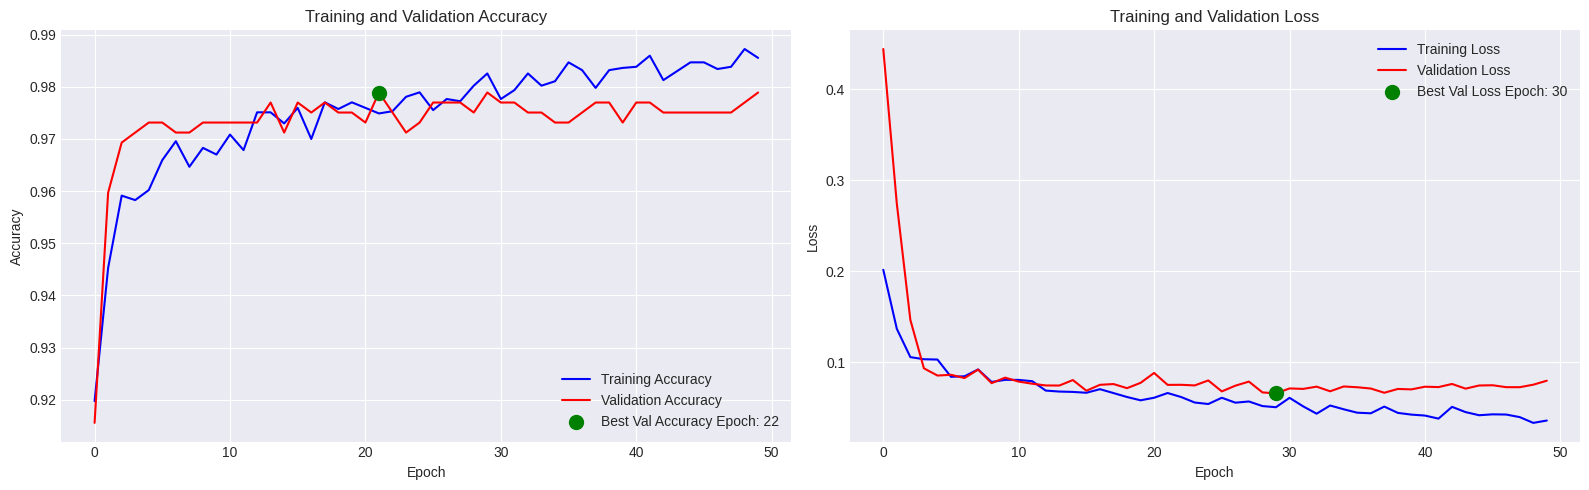

In [37]:
import matplotlib.pyplot as plt
import numpy as np # Make sure numpy is imported if not already

# Ensure seaborn is installed. If not, run: pip install seaborn
import seaborn as sns # Importing seaborn itself can make its styles available to matplotlib

# Assuming 'history' object is available from your model training
# history = model.fit(...)

# Get the epoch with the highest validation accuracy
# If early_stopping restored best weights, the best_epoch might be where
# validation loss was lowest, not necessarily accuracy highest.
# However, for plotting historical performance, finding the peak accuracy is fine.
best_epoch_val_accuracy = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
best_epoch_val_loss = history.history['val_loss'].index(min(history.history['val_loss'])) + 1

# If EarlyStopping was used with restore_best_weights=True, the model's
# weights correspond to the epoch with the lowest validation loss.
# It's good practice to mark that specific epoch on the loss plot.
# For accuracy, you might still want to highlight the peak.

# Set the background style
try:
    plt.style.use('seaborn-v0_8-darkgrid') # Use a more specific seaborn style name for newer matplotlib versions
except OSError:
    print("Could not find 'seaborn-v0_8-darkgrid' style, falling back to 'ggplot'.")
    plt.style.use('ggplot') # Fallback to a common style if seaborn one isn't found

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
# Mark the epoch with the highest validation accuracy
axs[0].scatter(best_epoch_val_accuracy - 1, history.history['val_accuracy'][best_epoch_val_accuracy - 1],
              color='green', marker='o', s=100, zorder=5,
              label=f'Best Val Accuracy Epoch: {best_epoch_val_accuracy}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()
axs[0].grid(True) # Ensure grid is visible with new style

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
# Mark the epoch with the lowest validation loss (where best weights were likely restored)
axs[1].scatter(best_epoch_val_loss - 1, history.history['val_loss'][best_epoch_val_loss - 1],
              color='green', marker='o', s=100, zorder=5,
              label=f'Best Val Loss Epoch: {best_epoch_val_loss}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()
axs[1].grid(True) # Ensure grid is visible with new style

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


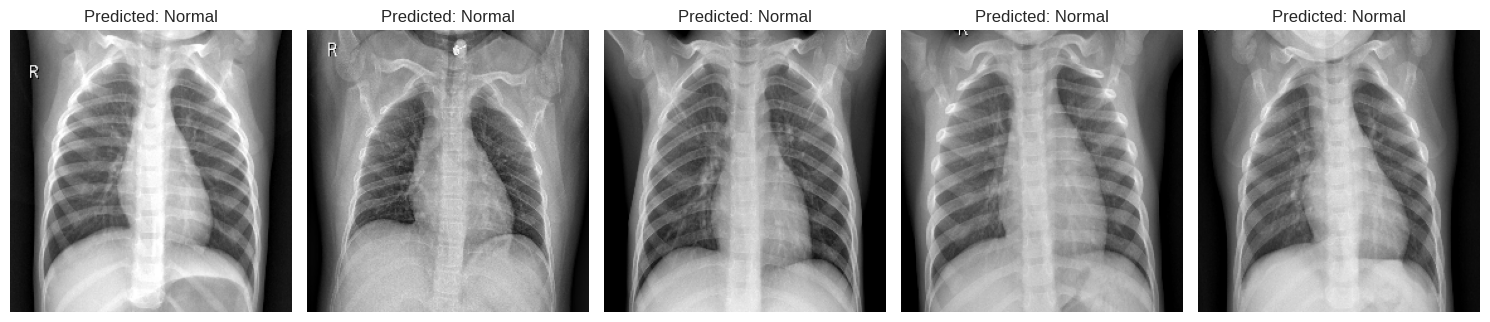

In [38]:
# Path to the directory containing the images
directory_path = '/content/gdrive/MyDrive/Colab Notebooks/INTAR/project/chest_xray/test/NORMAL/'

# Select N image files from the directory
image_files = os.listdir(directory_path)[40:45]

# Create a figure and axes for subplots
fig, axs = plt.subplots(1, len(image_files), figsize=(15, 5))

# Load and preprocess each image, make predictions, and display them using a loop
for i, image_file in enumerate(image_files):
    img_path = os.path.join(directory_path, image_file)
    # Load the image using OpenCV
    img = cv2.imread(img_path)
    # Resize the image to (256, 256)
    img = cv2.resize(img, (224, 224))

    # Normalize pixel values
    img_array = img.astype(np.float32) / 255.0

    # Expand the dimensions to match the input shape expected by the model
    img_array = np.expand_dims(img_array, axis=0)

     # Make predictions
    predictions = model.predict(img_array)
    actual_prediction = (predictions > 0.5).astype(int)

    # Display the image with predicted label
    # Convert BGR to RGB for displaying with matplotlib
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].axis('off')
    if actual_prediction[0][0] == 0:
        predicted_label = 'Normal'
    else:
        predicted_label = 'PNEUMONIA'
    axs[i].set_title(f'Predicted: {predicted_label}')

# Adjust layout
plt.tight_layout()
plt.show()

In [39]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)  # Output shape: (batch_size, 1)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype(int).flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


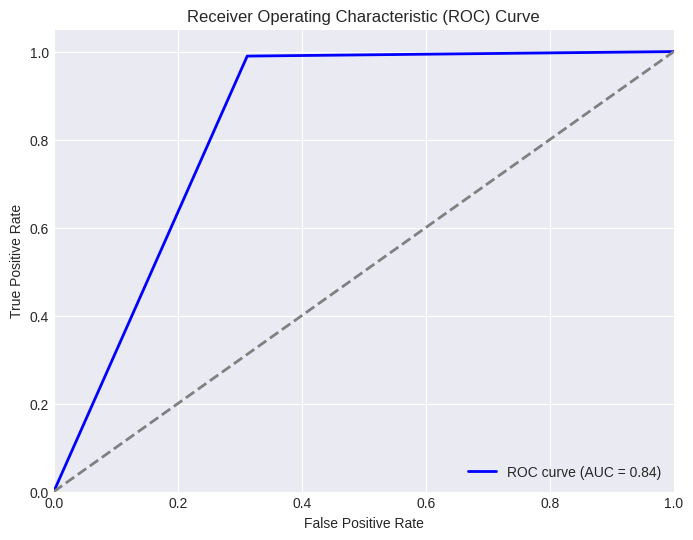

ROC AUC Score: 0.84


In [40]:
# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Calculate the ROC AUC score using sklearn's roc_auc_score
roc_auc_score_value = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the ROC AUC score
print(f'ROC AUC Score: {roc_auc_score_value:.2f}')

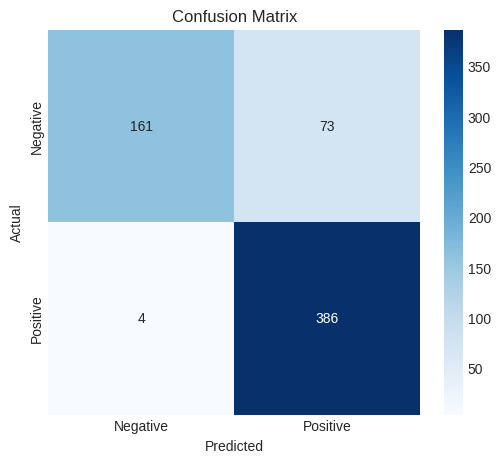

In [41]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [42]:
from sklearn.metrics import classification_report

# 4. Generate classification report
print(classification_report(y_true, y_pred, target_names=['Normal', 'Pneumonia']))

              precision    recall  f1-score   support

      Normal       0.98      0.69      0.81       234
   Pneumonia       0.84      0.99      0.91       390

    accuracy                           0.88       624
   macro avg       0.91      0.84      0.86       624
weighted avg       0.89      0.88      0.87       624



config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

`torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True`. Falling back to eager attention. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


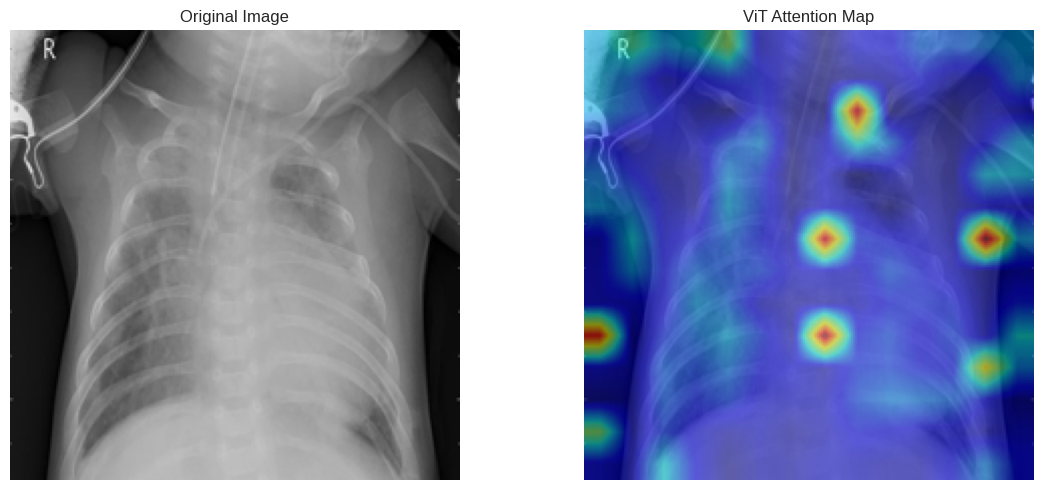

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from transformers import ViTFeatureExtractor, ViTModel

# Load pretrained ViT model with attention output
model_name = "google/vit-base-patch16-224"
model = ViTModel.from_pretrained(model_name, output_attentions=True)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Load and preprocess image
img_path = "/content/gdrive/MyDrive/Colab Notebooks/INTAR/project/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg"
image_pil = Image.open(img_path).convert("RGB")
inputs = feature_extractor(images=image_pil, return_tensors="pt")

# Get attention outputs
with torch.no_grad():
    outputs = model(**inputs)

# Get last layer attention: (batch, heads, tokens, tokens)
attentions = outputs.attentions[-1]
att_map = attentions[0].mean(0)[0, 1:].reshape(14, 14).numpy()  # CLS → patches

# Normalize and resize to match image
att_map /= att_map.max()
att_map_resized = Image.fromarray((att_map * 255).astype(np.uint8)).resize((224, 224), resample=Image.BILINEAR)
att_map_resized = np.array(att_map_resized)

# Plot original + attention overlay
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(image_pil.resize((224, 224)))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(image_pil.resize((224, 224)))
ax[1].imshow(att_map_resized, cmap='jet', alpha=0.5)
ax[1].set_title("ViT Attention Map")
ax[1].axis('off')

plt.tight_layout()
plt.show()
#
